<a href="https://colab.research.google.com/github/SewoongPark/SeSac_study_repo/blob/main/MNIST_fashion__%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 2.데이터탐색
- 모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


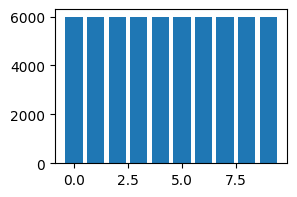

In [10]:
def labelUnique(data):
  tmp = np.unique(data, return_counts = True)
  print(tmp)
  plt.figure(figsize = (3, 2))
  plt.bar(tmp[0], tmp[1])
  plt.show()
labelUnique(train_labels)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


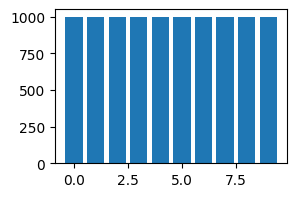

In [13]:
labelUnique(test_labels)

## 3.데이터전처리
- 네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

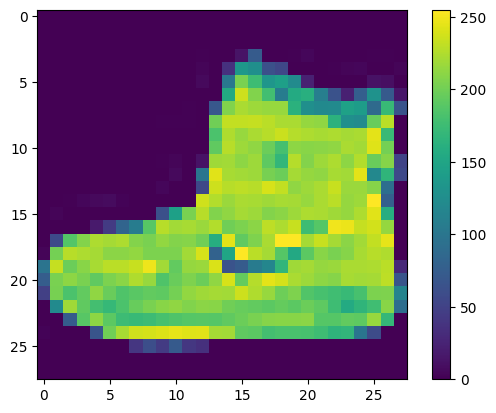

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
###########################3
## 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다.
# 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#트레이닝 데이터의 9 클래스 샘플 20개만 출력

In [37]:
train_labels.shape

(60000,)

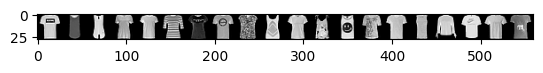

In [41]:
incides_of_9 = [i for i, label in enumerate(train_labels) if label == 0]
sample = incides_of_9[:20]
img = np.hstack(train_images[sample])
plt.imshow(img, cmap = "gray")

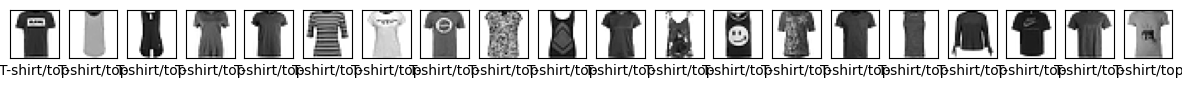

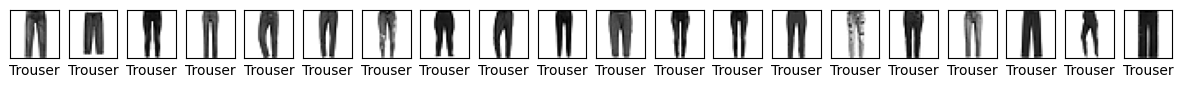

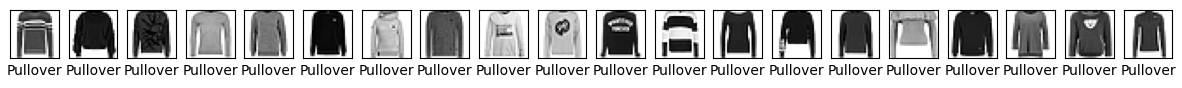

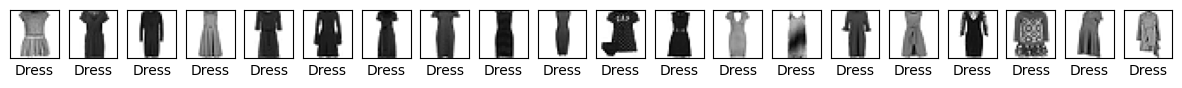

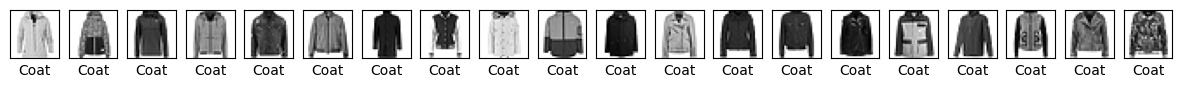

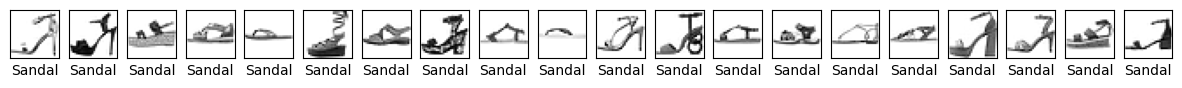

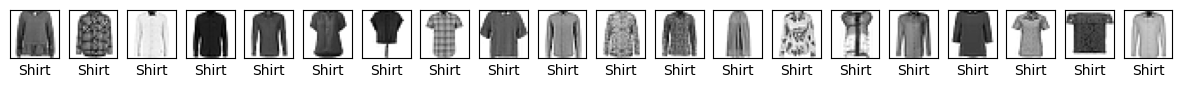

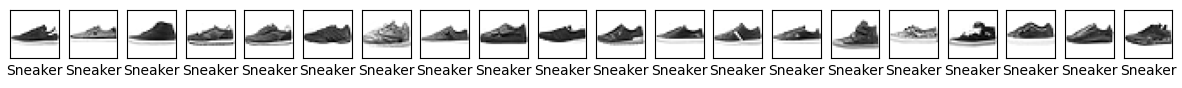

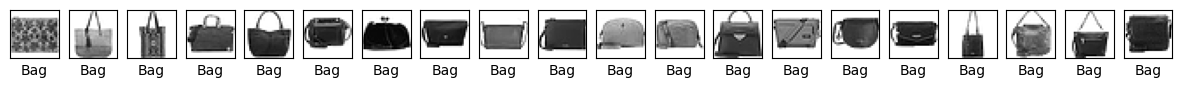

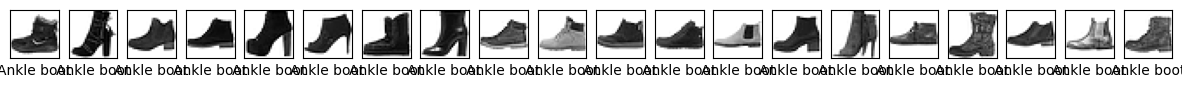

In [33]:
# 각 클래스마다 20개의 샘플을 출력
num_samples_per_class = 20
num_classes = len(class_names)

for class_idx in range(num_classes):
    # 클래스에 해당하는 샘플 인덱스를 가져옴
    class_samples_idx = np.where(train_labels == class_idx)[0][:num_samples_per_class]

    # 각 클래스 샘플을 출력
    plt.figure(figsize=(15, 1))
    for i, idx in enumerate(class_samples_idx):
        plt.subplot(1, num_samples_per_class, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[idx], cmap=plt.cm.binary)
        plt.xlabel(class_names[class_idx])
    plt.show()


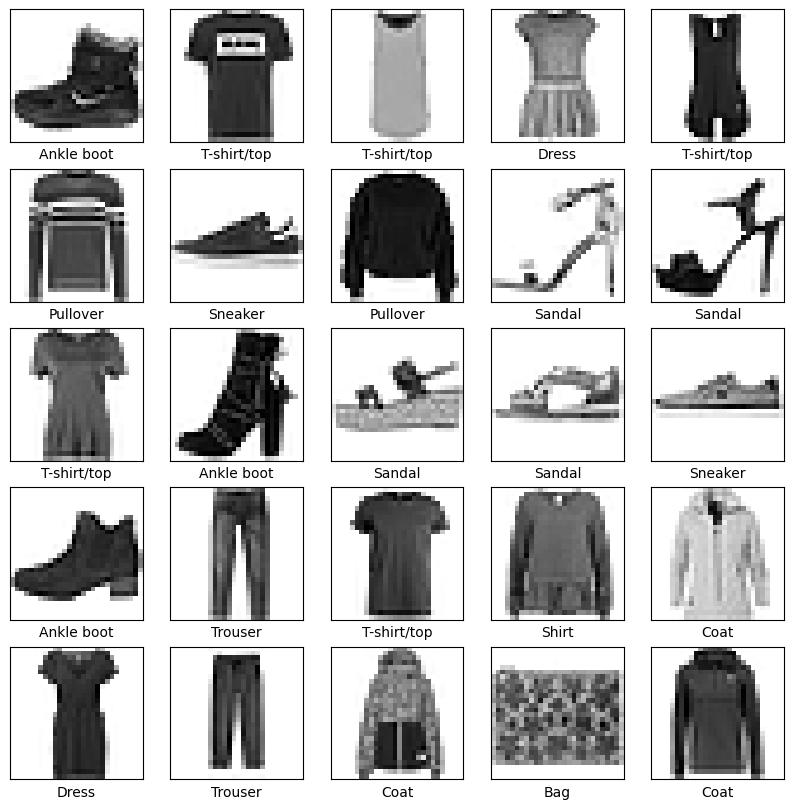

In [18]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4.모델구성
- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.
.


In [150]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10)

])

model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [151]:
#########
## 모델저장
###
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

hist=model.fit(train_images, train_labels,
               epochs=3,
               validation_data=(test_images, test_labels),callbacks=[checkpointer])

Epoch 1/3
1859/1875 [============================>.] - ETA: 0s - loss: 0.5007 - accuracy: 0.8249
Epoch 1: saving model to ./model/01-0.8287.hdf5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4999 - accuracy: 0.8251 - val_loss: 0.4823 - val_accuracy: 0.8287
Epoch 2/3
  53/1875 [..............................] - ETA: 5s - loss: 0.4157 - accuracy: 0.8491

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1865/1875 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8640
Epoch 2: saving model to ./model/02-0.8352.hdf5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3772 - accuracy: 0.8641 - val_loss: 0.4372 - val_accuracy: 0.8352
Epoch 3/3
1863/1875 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8774
Epoch 3: saving model to ./model/03-0.8514.hdf5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3394 - accuracy: 0.8771 - val_loss: 0.3894 - val_accuracy: 0.8514


## 5.정확도평가
- 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다
- 만들어진 모델의 레이어당 $w, b$를 이용한 계산 결과의 최종값이 test_label 값과 같은가(파악한 개수 / 전체 개수)

In [152]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3894 - accuracy: 0.8514 - 664ms/epoch - 2ms/step

Test accuracy: 0.8514000177383423


## 6.예측하기
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.
- y값을 원핫 인코딩 안 했을 경우 `tf.nn.softmax`함수 사용해야 함
- 이 코드 상에서 마지막 layer에서 softmax 사용하지 않았으므로 `probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])` 추가해야 함

In [153]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [148]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [149]:
predictions[0], np.sum(predictions[0]) # 합이 1이 되어야 함

(array([0.08577992, 0.08577909, 0.08577905, 0.08577902, 0.08577932,
        0.0869498 , 0.08577922, 0.0877575 , 0.08578122, 0.22483575],
       dtype=float32),
 0.9999999)

In [29]:
#####################33
## 이 예측은 10개의 숫자 배열로 나타납니다.
### 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.
## 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

np.argmax(predictions[0])

9

In [48]:
%pwd

'/content'

### **새로운 이미지로 예측 수행**

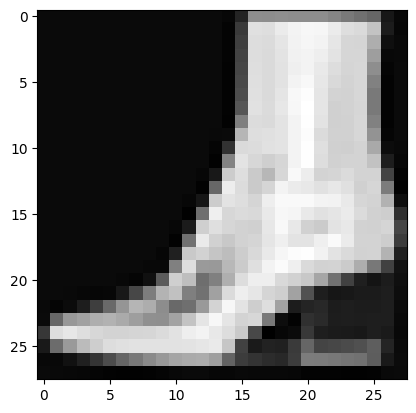

In [154]:
from PIL import Image
img = Image.open("./img.jpg").resize((28, 28)).convert("L")
img = img.transpose(Image.FLIP_LEFT_RIGHT) # 학습 데이터셋의 앵클 부츠 방향을 맞춰주기 위해 좌우 반전
img = 255 - np.array(img)
img = img/ 255.0

new_img = np.reshape(img, (1, 28, 28))
plt.imshow(img, cmap = "gray")

In [155]:
new_img.shape

(1, 28, 28)

In [156]:
new_predictions = probability_model.predict(new_img)

1/1 [==============================] - 0s 52ms/step


In [157]:
new_predictions[0]

array([7.28991517e-06, 3.48890083e-10, 5.54469581e-10, 7.09649561e-10,
       1.38821975e-11, 4.87880257e-04, 1.56927644e-08, 1.96888854e-04,
       2.92747215e-10, 9.99307871e-01], dtype=float32)

In [158]:
np.argmax(new_predictions[0])

9

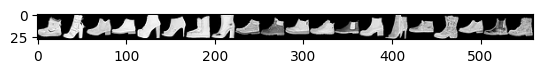

In [159]:
incides_of_9 = [i for i, label in enumerate(train_labels) if label == 9]
sample = incides_of_9[:20]
img = np.hstack(train_images[sample])
plt.imshow(img, cmap = "gray")

In [160]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

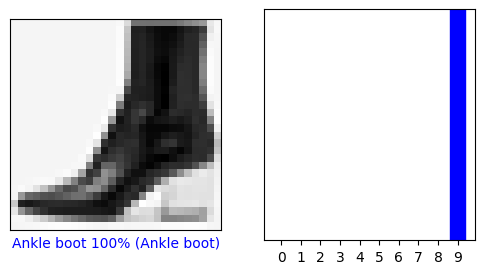

In [161]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, new_predictions[i], test_labels, new_img)
plt.subplot(1,2,2)
plot_value_array(i, new_predictions[i], test_labels)
plt.show()

In [177]:
len(train_labels)

60000

## **예측과 실제 값이 다른 데이터 출력**


In [210]:
def show_images_in_line(images, rows=1, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    axes = axes.ravel()
    for i in range(rows * cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

incorrect_images = []
incorrect_info = []

for i in range(len(train_labels[:1000])):
  bun = np.argmax(predictions[i])
  yhat = class_names[bun]
  real = class_names[test_labels[i]]
  if yhat != real:
    print("yhat:", yhat, "real:","/", real, "/", np.sum(predictions[i]))

    incorrect_images.append(train_images[i])
    incorrect_info.append((yhat, real, np.sum(predictions[i])))

# 저장된 이미지들을 한 줄에 표시
show_images_in_line(incorrect_images, rows=1, cols=len(incorrect_images))


yhat: Sandal real: / Sneaker / 0.99999994
yhat: Pullover real: / Coat / 0.99999994
yhat: Sandal real: / Ankle boot / 0.99999994
yhat: Pullover real: / Coat / 1.0
yhat: Shirt real: / Dress / 1.0000001
yhat: T-shirt/top real: / Shirt / 1.0
yhat: Shirt real: / Dress / 0.9999999
yhat: Shirt real: / Pullover / 1.0
yhat: Pullover real: / Coat / 1.0
yhat: T-shirt/top real: / Bag / 0.9999998
yhat: Shirt real: / Coat / 0.9999999
yhat: T-shirt/top real: / Pullover / 0.99999994
yhat: Sneaker real: / Ankle boot / 1.0
yhat: Pullover real: / Shirt / 1.0
yhat: Shirt real: / Coat / 0.99999994
yhat: Shirt real: / Pullover / 0.9999999
yhat: Pullover real: / Coat / 0.99999994
yhat: Dress real: / Shirt / 0.99999994
yhat: Dress real: / Coat / 0.99999994
yhat: Pullover real: / Coat / 0.9999998
yhat: Dress real: / Coat / 1.0
yhat: Pullover real: / Coat / 0.99999994
yhat: Shirt real: / Pullover / 0.99999994
yhat: T-shirt/top real: / Trouser / 1.0
yhat: Dress real: / Pullover / 0.9999998
yhat: Shirt real: / Pu

<ipython-input-210-0b32d95557df>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


In [162]:
hist.history

{'loss': [0.4998702108860016, 0.3771715760231018, 0.3393993079662323],
 'accuracy': [0.8251166939735413, 0.8640666604042053, 0.8771499991416931],
 'val_loss': [0.4823029339313507, 0.43717479705810547, 0.38944345712661743],
 'val_accuracy': [0.8287000060081482, 0.8352000117301941, 0.8514000177383423]}

### 학습 과정 시각화

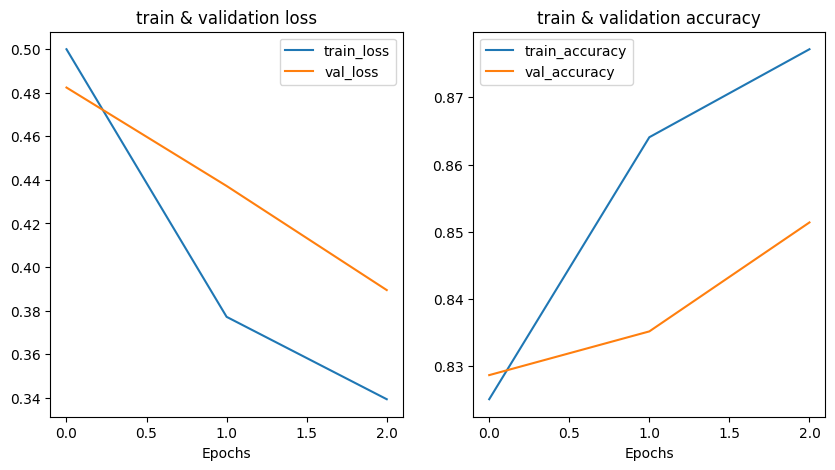

In [163]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label = "train_loss")
plt.plot(hist.history['val_loss'], label = "val_loss")
plt.title("train & validation loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label = "train_accuracy")
plt.plot(hist.history['val_accuracy'], label = "val_accuracy")
plt.title("train & validation accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()